In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline
from pybrain.tools.shortcuts import buildNetwork
from pybrain.tools.shortcuts import SigmoidLayer
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer

In [9]:
def get_err_in_percent(net,ds):
    h=net.activateOnDataset(ds)
    return 100-sum(h.argmax(axis=1)==ds['target'].argmax(axis=1))/float(ds['target'].shape[0])*100

In [8]:
small_test_ds=SupervisedDataSet.loadFromFile('small_test_ds_2X2X3')
small_train_ds=SupervisedDataSet.loadFromFile('small_train_ds_2X2X3')

In [3]:
small_nets=[]
small_err=[]
min_small_err=[]
for k in range(76,101):
    print k
    small_net=buildNetwork(12,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    small_trainer=BackpropTrainer(small_net,small_train_ds)
    small_err.append(small_trainer.trainUntilConvergence(maxEpochs=5000,continueEpochs=500,validationProportion=1/3.0))
    small_nets.append(small_net)

for e in small_err:
    min_small_err.append(min(e[1]))    
small_idx=min_small_err.index(min(min_small_err))

76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


13 0.0382269532142


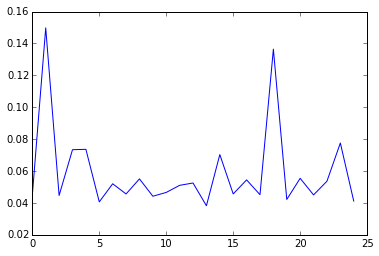

In [5]:
plt.plot(min_small_err)
print small_idx,(min_small_err[small_idx])

In [6]:
small_train_result=get_err_in_percent(small_nets[small_idx],small_train_ds)
small_train_result

26.0

In [9]:
small_test_result=get_err_in_percent(small_nets[small_idx],small_test_ds)
small_test_result

34.0

In [4]:
small_train_ds=SupervisedDataSet.loadFromFile('small_train_differences_ds_2X2X3+12X3')
small_test_ds=SupervisedDataSet.loadFromFile('small_test_differences_ds_2X2X3+12X3')

In [5]:
small_nets=[]
small_err=[]
min_small_err=[]
for k in range(101,151):
    print k
    small_net=buildNetwork(48,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    small_trainer=BackpropTrainer(small_net,small_train_ds)
    small_err.append(small_trainer.trainUntilConvergence(maxEpochs=5000,continueEpochs=500,validationProportion=1/3.0))
    small_nets.append(small_net)

for e in small_err:
    min_small_err.append(min(e[1]))    
small_idx=min_small_err.index(min(min_small_err))

101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150


26 0.0278381036839


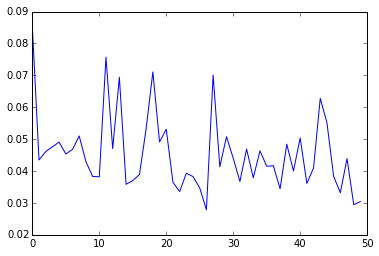

In [6]:
plt.plot(min_small_err)
print small_idx,(min_small_err[small_idx])

In [22]:
small_train_result=get_err_in_percent(small_nets[small_idx],small_train_ds)
small_train_result

7.6666666666666714

In [21]:
small_test_result=get_err_in_percent(small_nets[small_idx],small_test_ds)
small_test_result

13.0

In [16]:
small_net=small_nets[small_idx]

In [17]:
import pickle

In [18]:
f=open('small_net_2X2X3+12X3_v4.net', 'w')
pickle.dump(small_net,f)
f.close()